In [3]:
from datetime import date, timedelta
import yfinance as yf
import mercury as mr
import pandas as pd
import mplfinance as mpf

In [4]:
app = mr.App(title="Ticker Report", description="Report financial data for selected ticker")

mercury.App

In [33]:
ticker = mr.Text(label="Ticker", value="META")

mercury.Text

In [34]:
weeks = mr.Slider(label="Weeks", value=52, min=4, max=260)

mercury.Slider

In [35]:
start = date.today() - timedelta(weeks.value*7)
end = date.today() + timedelta(2)
df = pd.DataFrame(yf.download(ticker.value, start=start, end=end, progress=False))

In [36]:
round(df.High.max())

343

In [38]:
#mr.NumberBox([
#    mr.NumberBox(data=ticker.value),
#    mr.NumberBox(data=df.High.max().round(1), title=f"{weeks.value}-Week High"),
#    mr.NumberBox(data=df.Low.min().round(1), title=f"{weeks.value}-Week Low")
#])
mr.NumberBox([
    mr.NumberBox(data=ticker.value),
    mr.NumberBox(data=round(df.High.max()), title=f"{weeks.value}-Week High"),
    mr.NumberBox(data=round(df.Low.min()), title=f"{weeks.value}-Week Low")
])                 

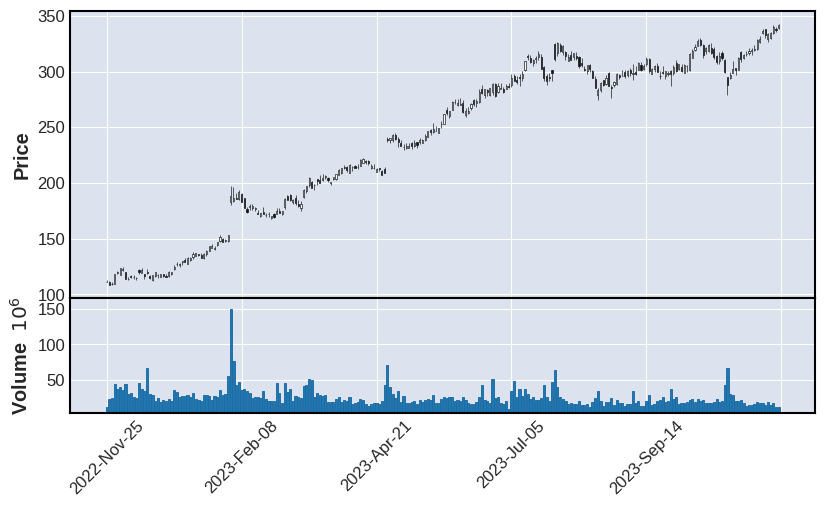

In [55]:
plot_type = "candle" if weeks.value < 53 else "line"
mpf.plot(df, type=plot_type, figratio=(18,10), volume=True)

In [54]:
df.head
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-09,319.420013,324.179993,318.799988,320.549988,320.549988,16103100
2023-11-10,319.940002,329.100006,319.459991,328.769989,328.769989,19096200
2023-11-13,326.200012,332.329987,325.700012,329.190002,329.190002,16908900
2023-11-14,334.540009,338.100006,333.329987,336.309998,336.309998,17179400
2023-11-15,337.929993,338.399994,330.019989,332.709991,332.709991,14531200
2023-11-16,329.369995,334.579987,326.380005,334.190002,334.190002,18932600
2023-11-17,330.260010,335.500000,329.350006,335.040009,335.040009,14494400
2023-11-20,334.890015,341.869995,334.190002,339.970001,339.970001,16960500
2023-11-21,338.329987,339.899994,335.899994,336.980011,336.980011,12027900
